<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2022/blob/main/Practice/Practice_5_FeedbackControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 5: Basics Of Feedback Control**
## **Goals for today**

---



During today practice we will:
* Consider a linear state feedback
* Learn the pole placement method


## **Idea of Control and Feedback**

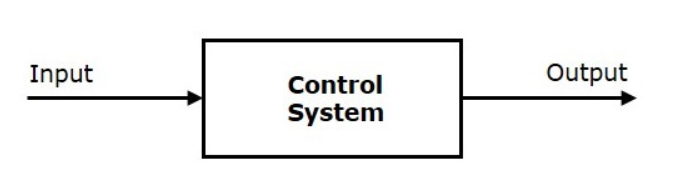

**Control Systems** can be classified as **open loop control systems** and **closed loop control systems** based on the feedback path.

In **open loop control systems**, output is not fed-back to the input. So, the control action is independent of the desired output.

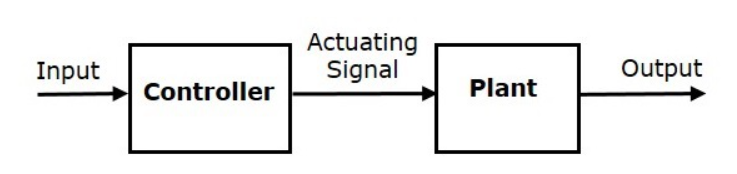

Here, an input is applied to a controller and it produces an actuating signal or controlling signal. This signal is given as an input to a plant or process which is to be controlled. So, the plant produces an output, which is controlled.

In **closed loop control systems**, output is fed-back to the input. So, the control action is dependent on the desired output.

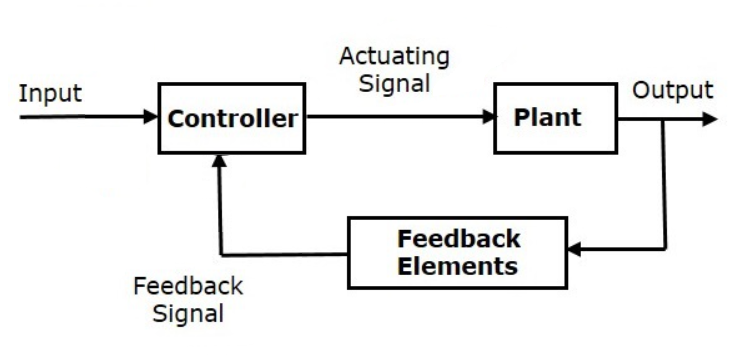

In this course we will consider two type of tasks:
*   **Stabilization** (regulation) a control system (stabilizer, or regulator) is to be designed so that the state of the closed-loop system will be stabilized around a **static point**.
*   **Tracking** (servo) the design objective is to construct a controller (tracker) so that the system output tracks a given time-varying trajectory.

A really nice visualization of control tasks are available [here](https://www.matthewpeterkelly.com/tutorials/pdControl/index.html)


One of the most widely used approaches supporting the solution of the problems above is the so-called **feedback control**

## **Linear State Feedback**

Recall the linear system in state space form:
\begin{equation}
\mathbf{\dot{x}}=\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}
\end{equation}

The general form of feedback that may stabilize our system is know to be linear:
\begin{equation}
\mathbf{u}=-\mathbf{K}\mathbf{x}
\end{equation}

Substitution to the system dynamics yields:
\begin{equation}
\mathbf{\dot{x}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\mathbf{x} = \mathbf{A}_c\mathbf{x}
\end{equation}
Thus the stability of the controlled system is completely determined by the eigen values of $\mathbf{A}_c$ and consequantially by the matrix $\mathbf{K}$


>### **Examples**

> **Model of Love**\
>Let us consider the example of "love" equations given in the first practice:
$$
\begin{cases}
\dot{R}=aR+bJ \\
\dot{J}=cR+dJ
\end{cases}
$$
>
>when $R$ and $J$ are time depended functions of Romeo's or Juliet's love (or hate if negative) and $a$, $b$, $c$ and $d$ is constants that determine the "Romantic styles". 

Eigen values:
[ 3.87298335 -3.87298335]


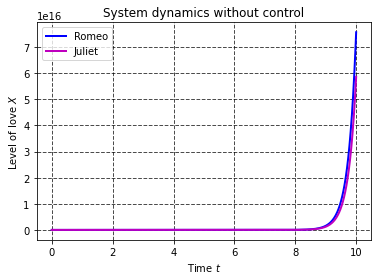

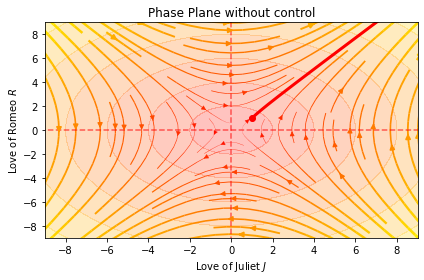

In [ ]:
import numpy as np
from scipy.integrate import odeint
from matplotlib.pyplot import *

def StateSpace_without_control(x, t, A):
  return np.dot(A,x)

def f(x, t, control=False):
    R, J = x[0], x[1]
    
    dR = a*R +b*J
    dJ = c*R + d*J

    if control:
      dR+= -k_1*e*R -k_2*e*J

    return dJ, dR

def draw_phase_plane(R, J, x0, plot_title, control = False):
  # Phase space with stream plot
  J_e_max, R_e_max = 10, 10
  J_e_span = np.arange(-J_e_max,J_e_max,0.1)
  R_e_span = np.arange(-R_e_max,R_e_max,0.1)
  J_e_grid, R_e_grid = np.meshgrid(J_e_span, R_e_span)

  figure()
  title("System dynamics "+plot_title)
  plot(t, R, linewidth=2.0, color = 'b', label = "Romeo")
  plot(t, J, linewidth=2.0, color = 'm', label = "Juliet")
  grid(True, color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  ylabel(r'Level of love ${X}$')
  xlabel(r'Time $t$')
  legend()
  show()

  figure()
  title("Phase Plane "+plot_title)
  # Varying color along a streamline
  L = (J_e_grid**2 + R_e_grid**2)**0.5
  lw = 3*L / L.max()
  contourf(J_e_span, R_e_span, L, cmap='autumn', alpha = 0.25)

  dJ, dR = f([R_e_grid, J_e_grid],t, control=control)

  strm = streamplot(J_e_span, R_e_span, dJ, dR, density = 1,color=L, cmap='autumn', linewidth = lw)

  plot(J, R, 'r-', lw = 3.0)
  plot(x0[1], x0[0], 'ro', lw = 10)
  hlines(0, -J_e_max, J_e_max,color = 'red', linestyle = '--', alpha = 0.6)
  vlines(0, -R_e_max, R_e_max,color = 'red', linestyle = '--', alpha = 0.6)
  xlim([-0.9*J_e_max,0.9*J_e_max])
  ylim([-0.9*R_e_max,0.9*R_e_max])
  xlabel(r'Love of Juliet ${J}$')
  ylabel(r'Love of Romeo ${R}$')
  tight_layout()
  show()
  return

#@markdown Romeo's parameters
a = 0 #@param {type:"slider", min:-10, max:10, step:1}
b = 5 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown Juliet's parameters
c = 3 #@param {type:"slider", min:-10, max:10, step:1}
d = 0 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown How much did Romeo and Juliet like each other at first sight?
R_0 = 1 #@param {type:"slider", min:-10, max:10, step:1}
J_0 = 1 #@param {type:"slider", min:-10, max:10, step:1}

A = np.array([[a, b],
              [c, d]])

x0 = np.array([R_0,
               J_0])  # initial state

Lambda, Q = np.linalg.eig(A)
print(f"Eigen values:\n{Lambda}")

t0 = 0 # Initial time 
tf = 10 # Final time
t = np.linspace(t0, tf, 1000)

love = odeint(StateSpace_without_control, x0, t, args=(A,))
R, J = love[:,0], love[:,1]

draw_phase_plane(R, J, x0, "without control")

>Suppose we can control Romeo's feelings with the coefficient $e$. So our control system will have following form:
\begin{equation}
\begin{bmatrix}
\dot{R} \\
\dot{J} 
\end{bmatrix} = 
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
\begin{bmatrix}
R \\
J 
\end{bmatrix} +
\begin{bmatrix}
e \\0 
\end{bmatrix}
u
\end{equation}
>
>Let's set the control signal to the following form:
$u = -\begin{bmatrix}
k_1 & k_2 
\end{bmatrix}\begin{bmatrix}
R \\
J 
\end{bmatrix}$
>
>After these changes, the dynamics of our system will have the following form:
\begin{equation}
\begin{bmatrix}
\dot{R} \\
\dot{J} 
\end{bmatrix} = 
\left(\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}-\begin{bmatrix}
e \\0 
\end{bmatrix}\begin{bmatrix}
k_1 & k_2 
\end{bmatrix} \right)
\begin{bmatrix}
R \\
J 
\end{bmatrix} = \begin{bmatrix}
a - ek_1 & b - ek_2 \\
c & d 
\end{bmatrix}\begin{bmatrix}
R \\
J 
\end{bmatrix}
\end{equation}

Eigen values:
[-2. -1.]


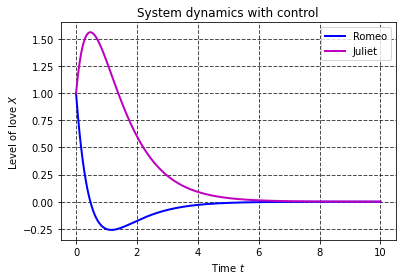

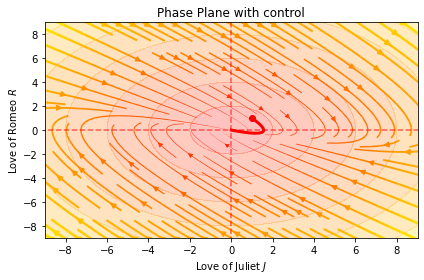

In [ ]:
def StateSpace_with_control(x, t, A, B, K):
    u = - np.dot(K,x)  
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

#@markdown Control parameters
e = 1 #@param {type:"slider", min:-10, max:10, step:1}

#@markdown Gain parameters
# k_1 = 3 #@param {type:"slider", min:-10, max:10, step:1}
# k_2 = 1 #@param {type:"slider", min:-10, max:10, step:1}

k_1 = 3
k_2 = 17/3

B = np.array([[e],
              [0]])

K = np.array([[k_1,k_2]]) 

Lambda, Q = np.linalg.eig(A-np.dot(B, K))
print(f"Eigen values:\n{Lambda}")

love = odeint(StateSpace_with_control, x0, t, args=(A, B, K,))
R, J = love[:,0], love[:,1]

draw_phase_plane(R, J, x0, "with control", control=True)

> **Mass-spring-damper system**
>
>Consider a following unforced system:
>
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>
>
>Dynamics of this system desribed by following ODE:
\begin{equation}
m\ddot{y} + b \dot{y} + k y = u
\end{equation}
>
>And one can formulate this system in state space as:
\begin{equation}
\dot{\mathbf{x}}
 = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} =
\begin{bmatrix}
\dot{y}\\
\ddot{y}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-\frac{k}{m} & -\frac{b}{m}
\end{bmatrix}
 \begin{bmatrix}
y\\
\dot{y}
\end{bmatrix}+
\begin{bmatrix}
0\\
\frac{1}{m}
\end{bmatrix}
u
\end{equation}
>
>Let us simulate the response of the system with different parameters:

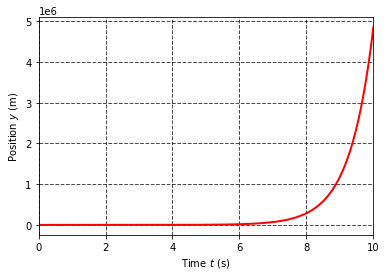

In [ ]:
#@markdown Mass-spring-damper parameters

m = 1 #@param {type:"slider", min:0, max:10, step:1}
k = 5 #@param {type:"slider", min:0, max:5, step:0.1}
b = 2 #@param {type:"slider", min:0, max:5, step:0.1}

#@markdown Initial state
x_0 = 7 #@param {type:"slider", min:-10, max:10, step:1}
dx_0 = 0 #@param {type:"slider", min:-2, max:2, step:0.1}

#@markdown Gain parameters
k_1 = -7 #@param {type:"slider", min:-10, max:10, step:1}
k_2 = -2 #@param {type:"slider", min:-10, max:10, step:1}

x0 = [x_0, dx_0] # Set initial state 

A = [[0,1],
     [-k/m, -b/m]]

B = [[0],
     [1/m]]

K = [[k_1, k_2]] 

x_sol = odeint(StateSpace_with_control, x0, t, args=(A, B, K,)) # integrate system "sys_ode" from initial state $x0$
y, dy = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states

plot(t, y, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${y}$ (m)')
xlabel(r'Time $t$ (s)')
show()

**NOTE**

> It is often the case (especially in fully actuated mechanical systems) that one can analyze system response and stability without actually transforming the system to state-space form, for instance, one may directly substitute control law to the system dynamics to analyze closed-loop response.

For instance consider the mass-spring damper above:

\begin{equation}
m\ddot{y} + b \dot{y} + k y = -k_1 y - k_2 \dot{y}
\end{equation}

which yields:

\begin{equation}
m\ddot{y} + (b + k_2) \dot{y} + (k + k_1) y = 0 
\end{equation}

It is obvious now which gains make this system stable

In case of mechanical systems (system of second order equations), the matrix $\mathbf{K}$ represent the so called proportinal-derivative (PD) controller  $\mathbf{K} = [\mathbf{k}_p,\mathbf{k}_d]^T$.





>### **Exercise** 

Find the gains $k_1, k_2$ that will stabilize the following system:
\begin{equation}
\mathbf{\dot{x}}
=
\begin{bmatrix}
3 & 1\\
1  & 3
\end{bmatrix}
\mathbf{x}
+
\begin{bmatrix}
0\\
1 
\end{bmatrix}
\mathbf{u}
\end{equation}
simulate the response. 


In [ ]:
# Put your code here

## **Pole placement method** or Full state feedback

**Pole placement**, is a method employed in feedback control system theory to place the closed-loop poles of a plant in pre-determined locations in the s-plane.

Placing poles is desirable because the location of the poles corresponds directly to the eigenvalues of the system, which control the characteristics of the response of the system. The system must be considered controllable in order to implement this method.

Let's consider the following dynamical system:
\begin{equation}
\mathbf{\dot{x}}=\begin{bmatrix}
1 & 1\\
1 & 1
\end{bmatrix}\mathbf{x} + \begin{bmatrix}
1\\
0
\end{bmatrix}\mathbf{u}
\end{equation}

Let's build a regulator based on a linear model of feedback control:
\begin{equation}
\mathbf{u}=-\mathbf{K}\mathbf{x}=-\begin{bmatrix}
k_1 & k_2
\end{bmatrix}\mathbf{x}
\end{equation}

And now we have a following system:
\begin{equation}
\mathbf{\dot{x}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\mathbf{x} = \mathbf{A}_c\mathbf{x}=\begin{bmatrix}
1-k_1 & 1-k_2\\
1 & 1
\end{bmatrix}
\end{equation}

Let's put this matrix into equation for eigenvalues:
\begin{equation}
\det \left(\begin{bmatrix}
1-k_1 & 1-k_2\\
1 & 1
\end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda
\end{bmatrix} \right)=0
\end{equation}

Now we get the following equation:
$$ \lambda^2 + (k_1 - 2)\lambda - k_1 + k_2=0$$
With roots:
$$\lambda_{1,2}=\frac{-k_1 \pm \sqrt{k_1^2-4k_2+4}}{2}  $$

The system will be stable if $\operatorname{Re}{\lambda_i} < 0$. Let's assume that $\lambda_1=-1$ and $\lambda_2=-2$ which we will call poles.

Now that we have fixed the poles we can calculate $k_1$ and $k_2$:
$$
\begin{equation}
\begin{cases}
\frac{-k_1 \pm \sqrt{k_1^2-4k_2+4}}{2} = -1\\
\frac{-k_1 \pm \sqrt{k_1^2-4k_2+4}}{2} = -2
\end{cases}
\end{equation}
$$
So we can express $k_1$ and $k_2$ and find their values. For this system solution will be following: $k_1 = 5$ and $k_2 = 7$

In [ ]:
from scipy.signal import place_poles

A = [[3,1],
     [1,3]]

B = [[0],
     [1]]

P = [-1, -2]

Lambda, Q = np.linalg.eig(A)
print(f"Eigen values of original system:\n{Lambda}\n")

pp =place_poles(np.array(A), np.array(B), np.array(P))

K = pp.gain_matrix
print(f"Calculated gains:\n{K}\n")

Lambda, Q = np.linalg.eig(A-np.dot(B, K))
print(f"Eigen values:\n{Lambda}")

Eigen values of original system:
[4. 2.]

Calculated gains:
[[21.  9.]]

Eigen values:
[-1. -2.]


>### **Exercises**

Find the gains $k_1, k_2$ that will stabilize the following system:
1. $$\dot{\mathbf{x}} = 
\begin{bmatrix} 0 & 1\\
 -7 & -7 \end{bmatrix} 
    \mathbf{x} + 
    \begin{bmatrix} 0 \\ 1 \end{bmatrix} \mathbf{u}
  $$

2. $$\mathbf{\dot{x}}=\begin{bmatrix}
10 & 5\\
-5 & -10
\end{bmatrix}\mathbf{x} + \begin{bmatrix}
-1\\
2
\end{bmatrix}\mathbf{u}
  $$

3. $$\mathbf{\dot{x}}=\begin{bmatrix}-8 & 1 \\ -2 & 2
\end{bmatrix}\mathbf{x} + \begin{bmatrix}
2\\
0
\end{bmatrix}\mathbf{u}
  $$

>### **Example**

>**Higher Order Systems. DC-motor dynamic model**
>
>Stabilization of the fully actuated second-order systems is a trivial task, however, in practice, you will face systems with higher dimensions, where defining the feedback gain may not be trivial. Thus one may use so-called pole-placement or LQR techniques
>
>Consider the DC motor equations:
>
>\begin{equation}
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} \\
\dot{i}
\end{bmatrix} 
=
\begin{bmatrix}
0 & 1 & 0 \\
0 & -\frac{b}{J} & \frac{K_m}{J} \\
0 & -\frac{K_v}{L} & -\frac{R}{L}
\end{bmatrix} 
\begin{bmatrix}
\theta \\
\dot{\theta} \\
i
\end{bmatrix}
+
\begin{bmatrix}
0 \\
0 \\
\frac{1}{L}
\end{bmatrix}
V
\end{equation}

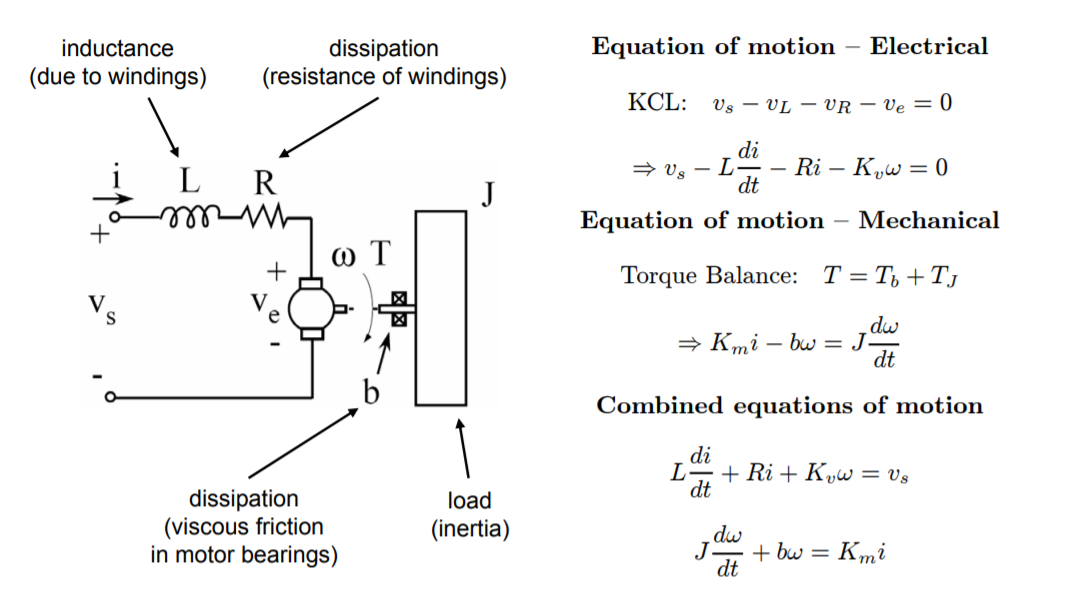

we will assume that full-state is given (measured).

Let us now try to assign stable poles in order to control DC motor

[[ 0.03240182 -0.02699589 -3.99285299]]


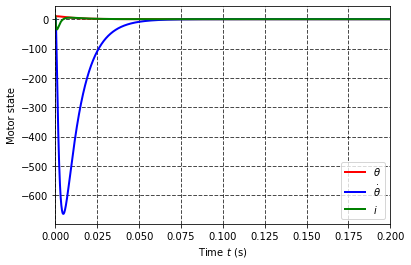

In [ ]:
k_m = 0.0274
k_e = k_m
J = 3.2284E-6
b = 3.5077E-6
L = 2.75E-6
R = 4

A = [[0, 1, 0],
     [0, -b/J, k_m/J],
     [0, -k_e/L, -R/L]]

B = [[0], 
     [0], 
     [1/L]];

P = [-100, -500, - 2000]

pp =place_poles(np.array(A), np.array(B), np.array(P)) 

K = pp.gain_matrix
print(K)

tf = 0.2 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
x0 = [10, 0, 10] # Set initial state 

x_sol = odeint(StateSpace_with_control, x0, t, args=(A, B, K,)) # integrate system "sys_ode" from initial state $x0$
theta, dtheta, i = x_sol[:,0], x_sol[:,1], x_sol[:,2] # set theta, dtheta to be a respective solution of system states

plot(t, theta, 'r', linewidth=2.0, label = r"$\theta$")
plot(t, dtheta, 'b', linewidth=2.0, label = r"$\dot{\theta}$")
plot(t, i, 'g', linewidth=2.0,label = r"$i$")
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Motor state')
xlabel(r'Time $t$ (s)')
show()